### This Notebook Showcases all of the Visualizations for our Dashboard

In [31]:
from reddit_scraper import RedditScraper
from dash import dcc
import plotly.express as px
import matplotlib.pyplot as plt
from models import Model
import seaborn as sns
import pandas as pd

In [2]:
scraper = RedditScraper()

In [3]:
df = scraper.scrape_subreddit_submissions("UIUC")
df.head()

,id,created_utc,title,text,author,score,upvote_ratio,num_comments,url
0,lypvic,2021-03-06 00:28:58,Reminder - the spam filter is a little too agg...,If you make a new post and don't see it appear...,Shifted-Paradigm,266,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...
1,1859gzi,2023-11-27 18:13:06,"New 'Sublease' Post Flair, now required for al...",We have added a new flair for sublease posts t...,love4boats,22,1.00,1,https://www.reddit.com/r/UIUC/comments/1859gzi...
2,18a359k,2023-12-03 20:58:50,how to unfuck my sleep?,at the start of the semester my sleep schedule...,asetofaces,69,0.96,38,https://www.reddit.com/r/UIUC/comments/18a359k...
3,18a8bj6,2023-12-04 00:54:44,hello kitty necklace,i left my necklace on the squat rack at arc an...,urcreeper_,14,0.90,1,https://www.reddit.com/r/UIUC/comments/18a8bj6...
4,18aa3m3,2023-12-04 02:28:29,Can you spare a minute to help this campaign?,,CuPride,8,0.90,0,https://chng.it/N6nk6Rmd6v


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            300 non-null    object        
 1   created_utc   300 non-null    datetime64[ns]
 2   title         300 non-null    object        
 3   text          300 non-null    object        
 4   author        300 non-null    object        
 5   score         300 non-null    int64         
 6   upvote_ratio  300 non-null    float64       
 7   num_comments  300 non-null    int64         
 8   url           300 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 21.2+ KB


### Visualization 1 - Word Cloud

In [9]:
from wordcloud import WordCloud
from PIL import Image


from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

def generate_wordcloud(df_):
    vocab = df_.dropna()['text'].str.replace(r'\?|\.|\'', ' ')
    vocab = ' '.join(vocab)
    vocab = ' '.join([i for i in vocab.split(' ') if i not in stopwords.words('english')])
    wc = WordCloud().generate(vocab)
    plt.imshow(wc)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timo7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


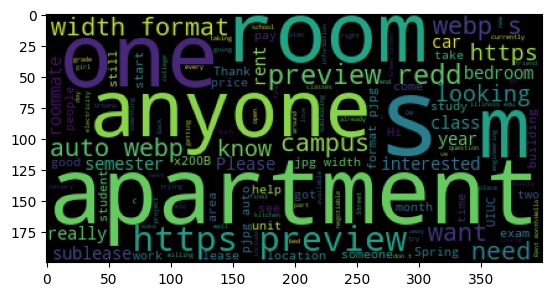

In [10]:
generate_wordcloud(df)

In [11]:
model = Model()
model.select_model('VADER')
df_polarity = model.get_polarity_scores(df)
df_polarity.head()

,neg,neu,pos,compound,id,sentiment,created_utc,title,text,author,score,upvote_ratio,num_comments,url
0,0.059,0.881,0.060,0.2617,lypvic,Positive,2021-03-06 00:28:58,Reminder - the spam filter is a little too agg...,If you make a new post and don't see it appear...,Shifted-Paradigm,266,0.99,1,https://www.reddit.com/r/UIUC/comments/lypvic/...
1,0.037,0.928,0.035,-0.0258,1859gzi,Neutral,2023-11-27 18:13:06,"New 'Sublease' Post Flair, now required for al...",We have added a new flair for sublease posts t...,love4boats,22,1.00,1,https://www.reddit.com/r/UIUC/comments/1859gzi...
2,0.052,0.894,0.054,-0.2152,18a359k,Negative,2023-12-03 20:58:50,how to unfuck my sleep?,at the start of the semester my sleep schedule...,asetofaces,69,0.96,38,https://www.reddit.com/r/UIUC/comments/18a359k...
3,0.163,0.758,0.079,-0.5307,18a8bj6,Negative,2023-12-04 00:54:44,hello kitty necklace,i left my necklace on the squat rack at arc an...,urcreeper_,14,0.90,1,https://www.reddit.com/r/UIUC/comments/18a8bj6...
4,0.000,0.000,0.000,0.0000,18aa3m3,Neutral,2023-12-04 02:28:29,Can you spare a minute to help this campaign?,,CuPride,8,0.90,0,https://chng.it/N6nk6Rmd6v


### Visualization 2, Sentiment Counts Over Time (will be a line grap)

- Group by Week, Plot Sentiment

In [32]:
df_polarity["week"] = df["created_utc"].dt.to_period("W").dt.to_timestamp()
df_polarity['week']

0     2021-03-01
1     2023-11-27
2     2023-11-27
3     2023-12-04
4     2023-12-04
         ...    
295   2023-11-27
296   2023-11-20
297   2023-11-27
298   2023-11-20
299   2023-11-27
Name: week, Length: 300, dtype: datetime64[ns]

In [36]:
df_polarity['date'] = pd.to_datetime(df_polarity['created_utc']).dt.date

<Axes: xlabel='date'>

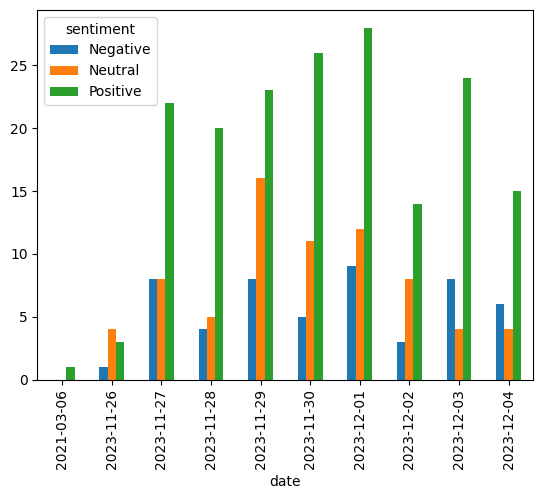

In [39]:
df_polarity.groupby('date')['sentiment'].value_counts().unstack().fillna(0).plot(kind='bar')

### Visualization 3, Pie Chart

<Axes: ylabel='count'>

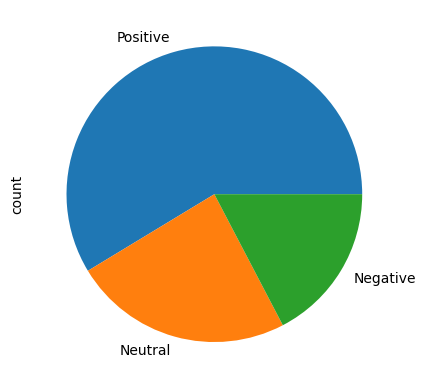

In [26]:
(df_polarity['sentiment'].value_counts() / len(df)).plot(kind='pie')